In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [7]:
import pandas as pd

# Verify the file exists and is a valid Excel file
!ls -l /content/Online\ Retail.xlsx

# Try reading the file, handling potential errors
try:
    data = pd.read_excel('/content/Online Retail.xlsx')
    print(data.head())
except FileNotFoundError:
    print("Error: File not found. Please check the file path.")
except ValueError:
    print("Error: File is not a valid Excel file.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

-rw-r--r-- 1 root root 23715344 Jun 12 09:11 '/content/Online Retail.xlsx'
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


In [8]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [10]:
data[data['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [11]:
data[data['UnitPrice']==0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom
538504,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,2011-12-08 13:58:00,0.0,NaN,United Kingdom
538505,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,2011-12-08 13:58:00,0.0,NaN,United Kingdom
538554,581408,85175,NaN,20,2011-12-08 14:06:00,0.0,NaN,United Kingdom


In [12]:

data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [13]:
# Xử lý giá trị thiếu
data.dropna(subset=['CustomerID'], inplace=True)  # Xóa bỏ hàng thiếu CustomerID
data.fillna(method='ffill', inplace=True)  # Điền thiếu bằng giá trị phía trước (cho Description)
# Xử lý giá trị sai lệch
data['Quantity'] = data['Quantity'].apply(lambda x: x if x > 0 else 0)  # Thay thế giá trị âm Quantity bằng 0
data = data[data['UnitPrice'] > 0]  # Xóa bỏ hàng có UnitPrice = 0
# Xử lý giá trị đặc biệt
data = data[~data['Description'].isin(['?', 'N/A'])]  # Xóa bỏ hàng có Description = '?', 'N/A'

1. Phân tích chung:
- Tính tổng doanh thu bán hàng trong 1 năm.
- Xác định top 5 sản phẩm bán chạy nhất (theo số lượng bán ra).
- Vẽ biểu đồ cột thể hiện doanh thu theo từng quốc gia.
2. Phân tích theo thời gian:
- Vẽ biểu đồ đường thể hiện xu hướng doanh thu theo thời gian (theo tháng).
- Xác định tháng có doanh thu cao nhất và thấp nhất.
- Tính doanh thu trung bình mỗi ngày trong 1 năm.
3. Phân tích khách hàng:
- Xác định khách hàng có giá trị (high-value customer) dựa vào tổng giá trị đơn hàng.
- Phân tích quốc gia nào có mức chi tiêu trung bình cao nhất.

##Tính tổng doanh thu bán hàng trong 1 năm.

In [14]:
df_filtered = data[data['InvoiceDate'].dt.year==2010]
# Tính tổng doanh thu
Revenue=df_filtered['Quantity'] * df_filtered['UnitPrice']
print("doanh thu 2010 la ",Revenue.sum())


df_filtered2011 = data[data['InvoiceDate'].dt.year==2011]
# Tính tổng doanh thu
Revenue_2011=df_filtered2011['Quantity'] * df_filtered2011['UnitPrice']
print("doanh thu 2011 la ",Revenue_2011.sum())


doanh thu 2010 la  570422.73
doanh thu 2011 la  8316786.164000003


##Xác định top 5 sản phẩm bán chạy nhất (theo số lượng bán ra).

In [15]:
data.groupby("StockCode")['Quantity'].sum().sort_values(ascending=False).head(5)

StockCode
23843     80995
23166     77916
84077     54319
22197     49160
85099B    46078
Name: Quantity, dtype: int64

##Vẽ biểu đồ cột thể hiện doanh thu theo từng quốc gia.

<ipython-input-16-6e128c3783cd>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=revenue_by_country, x='Country', y='revenue', palette='viridis')


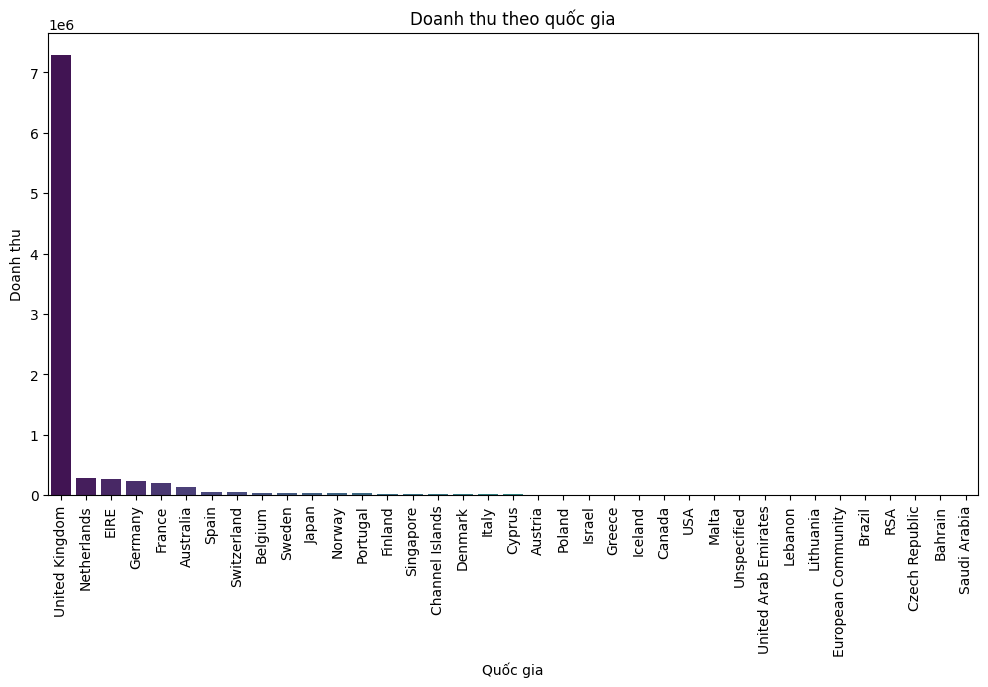

In [16]:

# Tính doanh thu cho từng dòng
data1 = data.copy()
data1['revenue'] = data1['Quantity'] * data1['UnitPrice']

# Tính tổng doanh thu theo quốc gia
revenue_by_country = data1.groupby('Country')['revenue'].sum().sort_values(ascending=False).reset_index()

# Vẽ biểu đồ cột
plt.figure(figsize=(12, 6))  # Thay đổi kích thước biểu đồ cho dễ nhìn hơn
sns.barplot(data=revenue_by_country, x='Country', y='revenue', palette='viridis')
plt.xticks(rotation=90)  # Xoay nhãn trục x để tránh bị chồng chéo

# Hiển thị biểu đồ
plt.title('Doanh thu theo quốc gia')
plt.xlabel('Quốc gia')
plt.ylabel('Doanh thu')
plt.show()

##Vẽ biểu đồ đường thể hiện xu hướng doanh thu theo thời gian (theo tháng).

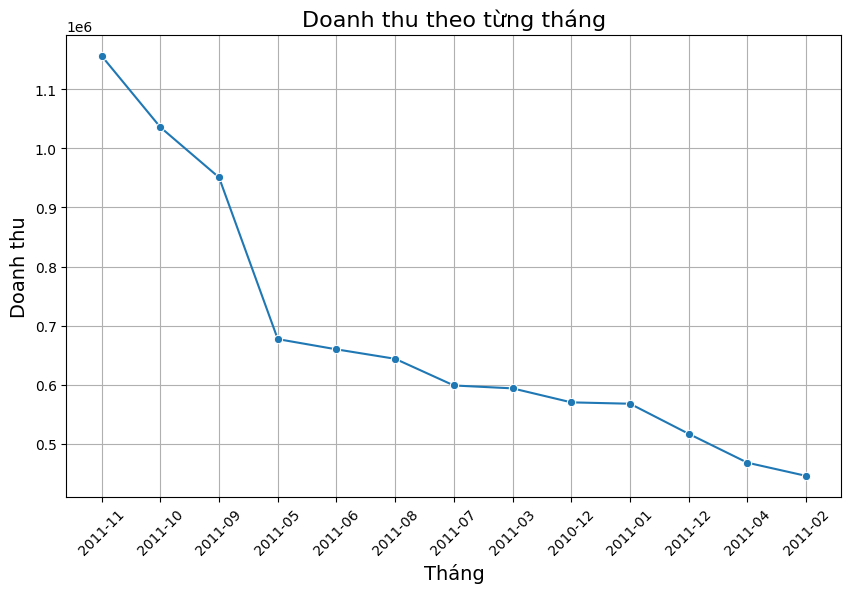

In [17]:
# Tính doanh thu cho từng dòng
data1 = data.copy()
data1['revenue'] = data1['Quantity'] * data1['UnitPrice']
data1['month_year'] = data1['InvoiceDate'].dt.to_period('M')
# Tính tổng doanh thu theo tháng
revenue_by_month = data1.groupby('month_year')['revenue'].sum().sort_values(ascending=False).reset_index()

# Convert 'month_year' to string for plotting
revenue_by_month['month_year'] = revenue_by_month['month_year'].astype(str) # Convert Period object to string

# Vẽ biểu đồ đường
plt.figure(figsize=(10, 6))
sns.lineplot(data=revenue_by_month, x='month_year', y='revenue', marker='o')

# Thêm tiêu đề và nhãn trục
plt.title('Doanh thu theo từng tháng', fontsize=16)
plt.xlabel('Tháng', fontsize=14)
plt.ylabel('Doanh thu', fontsize=14)

# Hiển thị biểu đồ
plt.xticks(rotation=45)  # Xoay nhãn trục x để dễ đọc
plt.grid(True)
plt.show()

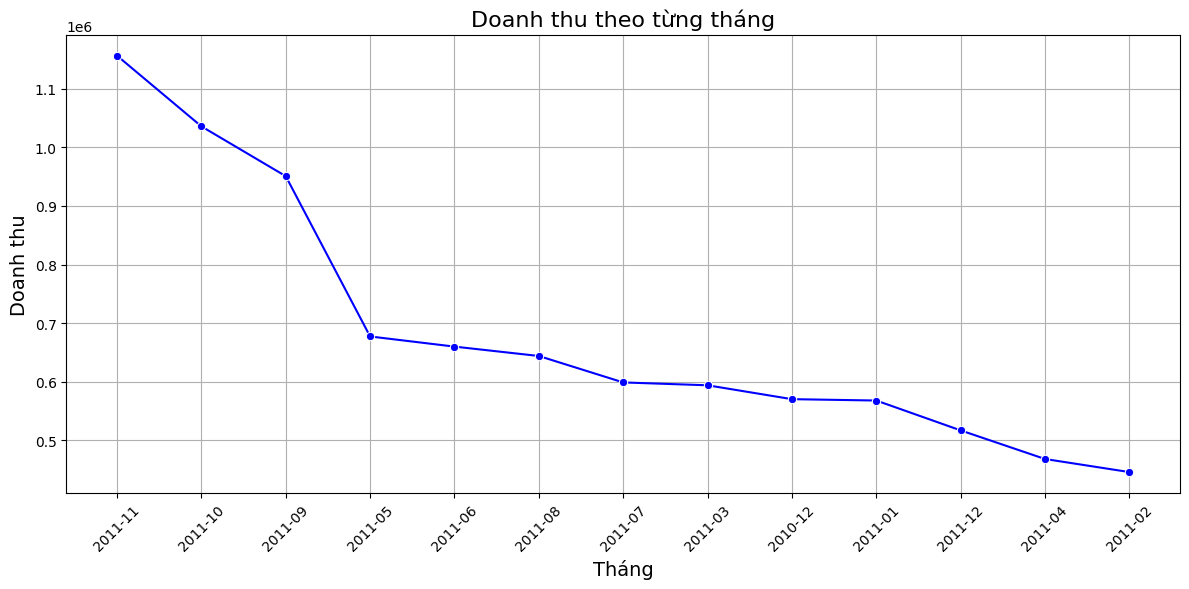

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ... (thực hiện các bước làm sạch dữ liệu ở trên)

# Tính doanh thu cho từng dòng
data1 = data.copy()
data1['revenue'] = data1['Quantity'] * data1['UnitPrice']
data1['month_year'] = data1['InvoiceDate'].dt.to_period('M')

# Tính tổng doanh thu theo tháng
revenue_by_month = data1.groupby('month_year')['revenue'].sum().sort_values(ascending=False).reset_index()

# Convert 'month_year' to string for plotting
revenue_by_month['month_year'] = revenue_by_month['month_year'].astype(str)  # Convert Period object to string

# Vẽ biểu đồ đường
plt.figure(figsize=(12, 6))  # Thay đổi kích thước biểu đồ
sns.lineplot(data=revenue_by_month, x='month_year', y='revenue', marker='o', color='blue')  # Chọn màu cho đường

# Thêm tiêu đề và nhãn trục
plt.title('Doanh thu theo từng tháng', fontsize=16)
plt.xlabel('Tháng', fontsize=14)
plt.ylabel('Doanh thu', fontsize=14)

# Hiển thị biểu đồ
plt.xticks(rotation=45)  # Xoay nhãn trục x để dễ đọc
plt.grid(True)
plt.tight_layout()  # Điều chỉnh bố cục để tránh nhãn bị che khuất
plt.show()

##Xác định tháng có doanh thu cao nhất và thấp nhất.

In [19]:
# Tính doanh thu cho từng dòng
data1 = data.copy()
data1['revenue'] = data1['Quantity'] * data1['UnitPrice']
data1['month_year'] = data1['InvoiceDate'].dt.to_period('M')
# Tính tổng doanh thu theo tháng
print( data1.groupby('month_year')['revenue'].sum().sort_values(ascending=False).reset_index().head(1))
print( data1.groupby('month_year')['revenue'].sum().sort_values(ascending=False).reset_index().tail(1))

  month_year     revenue
0    2011-11  1156205.61
   month_year    revenue
12    2011-02  446084.92


##Tính doanh thu trung bình mỗi ngày trong 1 năm.

In [20]:

# Tính doanh thu cho từng dòng
data['revenue'] = data['Quantity'] * data['UnitPrice']

# Tính doanh thu trung bình mỗi ngày trong năm 2010
df_2010 = data[data['InvoiceDate'].dt.year == 2010]
revenue_by_day_2010 = df_2010.groupby(df_2010['InvoiceDate'].dt.date)['revenue'].mean()
print("Doanh thu trung bình mỗi ngày trong năm 2010 là:", revenue_by_day_2010.mean())

# Tương tự, tính doanh thu trung bình mỗi ngày trong năm 2011
df_2011 = data[data['InvoiceDate'].dt.year == 2011]
revenue_by_day_2011 = df_2011.groupby(df_2011['InvoiceDate'].dt.date)['revenue'].mean()
print("Doanh thu trung bình mỗi ngày trong năm 2011 là:", revenue_by_day_2011.mean())

Doanh thu trung bình mỗi ngày trong năm 2010 là: 22.689088138894697
Doanh thu trung bình mỗi ngày trong năm 2011 là: 23.317467915095232


##Xác định khách hàng có giá trị (high-value customer) dựa vào tổng giá trị đơn hàng.


In [21]:

# Tính doanh thu cho từng dòng
data['revenue'] = data['Quantity'] * data['UnitPrice']

# Tính tổng giá trị đơn hàng cho mỗi khách hàng
customer_revenue = data.groupby('CustomerID')['revenue'].sum().reset_index()

# Xác định ngưỡng cho high-value customer (top 10%)
threshold = customer_revenue['revenue'].quantile(0.9)

# Lọc khách hàng có giá trị
high_value_customers = customer_revenue[customer_revenue['revenue'] >= threshold]

print("Khách hàng có giá trị (high-value customer):")
print(high_value_customers)

Khách hàng có giá trị (high-value customer):
      CustomerID   revenue
0        12346.0  77183.60
1        12347.0   4310.00
10       12357.0   6207.67
12       12359.0   6310.03
15       12362.0   5226.23
...          ...       ...
4323     18223.0   6484.54
4325     18225.0   5504.96
4326     18226.0   5228.05
4329     18229.0   7276.90
4346     18251.0   4314.72

[438 rows x 2 columns]


##Phân tích quốc gia nào có mức chi tiêu trung bình cao nhất.

In [23]:
# Tính doanh thu cho từng dòng
data['revenue'] = data['Quantity'] * data['UnitPrice']

# Tính chi tiêu trung bình cho mỗi khách hàng
customer_average_spending = data.groupby('CustomerID')['revenue'].mean().reset_index()

# Merge customer_average_spending with the original data to get the 'Country' column
customer_average_spending = customer_average_spending.merge(data[['CustomerID', 'Country']], on='CustomerID', how='left')

# Tính chi tiêu trung bình cho mỗi quốc gia
country_average_spending = customer_average_spending.groupby('Country')['revenue'].mean().reset_index()

# Sắp xếp theo thứ tự giảm dần của chi tiêu trung bình
country_average_spending = country_average_spending.sort_values(by='revenue', ascending=False)

# In ra quốc gia có chi tiêu trung bình cao nhất
print("Quốc gia có mức chi tiêu trung bình cao nhất:", country_average_spending.iloc[0]['Country'])

Quốc gia có mức chi tiêu trung bình cao nhất: Netherlands


##Áp dụng Logistic Regression cho phân loại khách hàng

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Tính tổng giá trị đơn hàng cho mỗi khách hàng
customer_revenue = data.groupby('CustomerID')['revenue'].sum().reset_index()

# Tạo cột 'customer_segment' dựa trên ngưỡng phân vị (top 10%)
threshold = customer_revenue['revenue'].quantile(0.9)
customer_revenue['customer_segment'] = np.where(customer_revenue['revenue'] >= threshold, 1, 0)

# Chuẩn bị dữ liệu cho mô hình
X = customer_revenue[['revenue']]  # Dữ liệu đầu vào: tổng giá trị đơn hàng
y = customer_revenue['customer_segment']  # Dữ liệu đầu ra: phân loại khách hàng

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tạo mô hình Logistic Regression
model = LogisticRegression()

# Huấn luyện mô hình
model.fit(X_train, y_train)

# Dự đoán phân loại cho tập kiểm tra
y_pred = model.predict(X_test)

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Độ chính xác của mô hình: {accuracy}")
print("Ma trận nhầm lẫn:")
print(confusion_mat)
print("Báo cáo phân loại:")
print(classification_rep)

Độ chính xác của mô hình: 0.9988571428571429
Ma trận nhầm lẫn:
[[774   1]
 [  0 100]]
Báo cáo phân loại:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       775
           1       0.99      1.00      1.00       100

    accuracy                           1.00       875
   macro avg       1.00      1.00      1.00       875
weighted avg       1.00      1.00      1.00       875



=>>Số lượng high-value customer (lớp 1) trong tập kiểm tra thấp (100): Điều này có thể dẫn đến việc đánh giá mô hình bị sai lệch. Mô hình có thể dễ dàng đạt được độ chính xác cao khi tập kiểm tra có sự chênh lệch lớn về số lượng dữ liệu giữa các lớp.